In [1]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/sailuadhikari/opt/anaconda3/lib/python3.8/site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from fredapi import Fred
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
Fred

fredapi.fred.Fred

2.1.Time series plots of Bitcoin, Gold and S&P500

<AxesSubplot:>

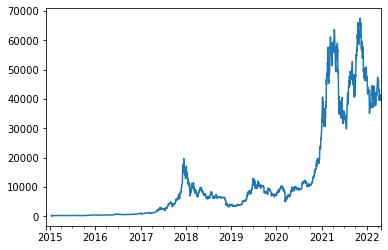

In [5]:
#Bitcoin
fred = Fred(api_key ='16fa137c95a7de71eeccf5184056f219')
bitcoinprice = fred.get_series('CBBTCUSD')
bitcoinprice.plot()

<AxesSubplot:>

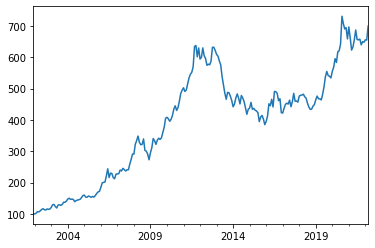

In [6]:
#Gold
fred = Fred(api_key ='16fa137c95a7de71eeccf5184056f219')
goldprice = fred.get_series('ID7108')
goldprice.plot()

<AxesSubplot:>

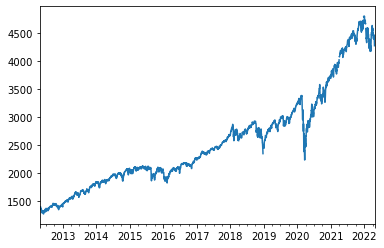

In [7]:
#S&P500
fred = Fred(api_key ='16fa137c95a7de71eeccf5184056f219')
marketprice = fred.get_series('SP500')
marketprice.plot()

2.2.Data Transformation

In [8]:
#bitcoin price dataframe
bitcoinprice_df=pd.DataFrame({'Date': bitcoinprice.index,'Price': bitcoinprice.values})
bitcoinprice_df

,Date,Price
0,2014-12-01,370.00
1,2014-12-02,378.00
2,2014-12-03,378.00
3,2014-12-04,377.10
4,2014-12-05,NaN
...,...,...
2697,2022-04-20,41350.25
2698,2022-04-21,40464.52
2699,2022-04-22,39708.20
2700,2022-04-23,39468.10


In [9]:
# bitcoin latest from 2016
bitcoin_latest = bitcoinprice_df[bitcoinprice_df['Date']>='2016-01-01']
bitcoin_latest

,Date,Price
396,2016-01-01,435.66
397,2016-01-02,435.40
398,2016-01-03,431.91
399,2016-01-04,433.85
400,2016-01-05,433.34
...,...,...
2697,2022-04-20,41350.25
2698,2022-04-21,40464.52
2699,2022-04-22,39708.20
2700,2022-04-23,39468.10


In [10]:
#bitcoin monthly price
bitcoin_mnth=bitcoin_latest.groupby([bitcoin_latest['Date'].dt.year, bitcoin_latest['Date'].dt.month], as_index=False).last()
bitcoin_mnth

,Date,Price
0,2016-01-31,367.95
1,2016-02-29,436.44
2,2016-03-31,416.03
3,2016-04-30,454.02
4,2016-05-31,531.34
...,...,...
71,2021-12-31,46244.63
72,2022-01-31,38430.30
73,2022-02-28,43206.02
74,2022-03-31,45475.83


In [11]:
#bitcoin monthly returns
bitcoin_mnth['rbt'] = np.log(bitcoin_mnth.Price/bitcoin_mnth.Price.shift(1))
bitcoin_mnth.dropna()

,Date,Price,rbt
1,2016-02-29,436.44,0.170704
2,2016-03-31,416.03,-0.047894
3,2016-04-30,454.02,0.087384
4,2016-05-31,531.34,0.157261
5,2016-06-30,673.49,0.237071
...,...,...,...
71,2021-12-31,46244.63,-0.206989
72,2022-01-31,38430.30,-0.185099
73,2022-02-28,43206.02,0.117134
74,2022-03-31,45475.83,0.051201


In [12]:
#Gold price Datafarme
goldprice_df=pd.DataFrame({'Date': goldprice.index,'Price': goldprice.values})
goldprice_df

,Date,Price
0,2001-12-01,100.0
1,2002-01-01,99.8
2,2002-02-01,101.8
3,2002-03-01,106.8
4,2002-04-01,106.4
...,...,...
239,2021-11-01,649.7
240,2021-12-01,648.0
241,2022-01-01,655.7
242,2022-02-01,654.8


In [13]:
#Gold price latest from 2016
goldprice_latest = goldprice_df[goldprice_df['Date']>='2016-01-01']
goldprice_latest

,Date,Price
169,2016-01-01,395.0
170,2016-02-01,412.4
171,2016-03-01,451.2
172,2016-04-01,445.4
173,2016-05-01,465.7
...,...,...
239,2021-11-01,649.7
240,2021-12-01,648.0
241,2022-01-01,655.7
242,2022-02-01,654.8


In [14]:
#monthly gold price we get the same data as the latest because gold price data is already a monthly data
goldprice_mnth=goldprice_latest.groupby([goldprice_latest['Date'].dt.year, goldprice_latest['Date'].dt.month], as_index=False).last()
goldprice_mnth

,Date,Price
0,2016-01-01,395.0
1,2016-02-01,412.4
2,2016-03-01,451.2
3,2016-04-01,445.4
4,2016-05-01,465.7
...,...,...
70,2021-11-01,649.7
71,2021-12-01,648.0
72,2022-01-01,655.7
73,2022-02-01,654.8


In [15]:
#gold monthly returns
goldprice_mnth['rgt'] = np.log(goldprice_mnth.Price/goldprice_mnth.Price.shift(1))
goldprice_mnth.dropna()

,Date,Price,rgt
1,2016-02-01,412.4,0.043108
2,2016-03-01,451.2,0.089917
3,2016-04-01,445.4,-0.012938
4,2016-05-01,465.7,0.044569
5,2016-06-01,441.3,-0.053817
...,...,...,...
70,2021-11-01,649.7,0.015824
71,2021-12-01,648.0,-0.002620
72,2022-01-01,655.7,0.011813
73,2022-02-01,654.8,-0.001374


In [16]:
#market price dataframe
marketprice_df=pd.DataFrame({'Date': marketprice.index,'Price': marketprice.values})
marketprice_df

,Date,Price
0,2012-04-23,1366.94
1,2012-04-24,1371.97
2,2012-04-25,1390.69
3,2012-04-26,1399.98
4,2012-04-27,1403.36
...,...,...
2605,2022-04-18,4391.69
2606,2022-04-19,4462.21
2607,2022-04-20,4459.45
2608,2022-04-21,4393.66


In [17]:
# marketprice latest from 2016
marketprice_latest = marketprice_df[marketprice_df['Date']>='2016-01-01']
marketprice_latest

,Date,Price
964,2016-01-01,NaN
965,2016-01-04,2012.66
966,2016-01-05,2016.71
967,2016-01-06,1990.26
968,2016-01-07,1943.09
...,...,...
2605,2022-04-18,4391.69
2606,2022-04-19,4462.21
2607,2022-04-20,4459.45
2608,2022-04-21,4393.66


In [18]:
#monthly market price
marketprice_mnth=marketprice_latest.groupby([marketprice_latest['Date'].dt.year, marketprice_latest['Date'].dt.month], as_index=False).last()
marketprice_mnth

,Date,Price
0,2016-01-29,1940.24
1,2016-02-29,1932.23
2,2016-03-31,2059.74
3,2016-04-29,2065.30
4,2016-05-31,2096.96
...,...,...
71,2021-12-31,4766.18
72,2022-01-31,4515.55
73,2022-02-28,4373.94
74,2022-03-31,4530.41


In [19]:
#market price monthly returns
marketprice_mnth['rmt'] = np.log(marketprice_mnth.Price/marketprice_mnth.Price.shift(1))
marketprice_mnth.dropna()

,Date,Price,rmt
1,2016-02-29,1932.23,-0.004137
2,2016-03-31,2059.74,0.063905
3,2016-04-29,2065.30,0.002696
4,2016-05-31,2096.96,0.015213
5,2016-06-30,2098.86,0.000906
...,...,...,...
71,2021-12-31,4766.18,0.042689
72,2022-01-31,4515.55,-0.054018
73,2022-02-28,4373.94,-0.031863
74,2022-03-31,4530.41,0.035148


2.3. Data Analysis

2.3. Correlation

In [20]:
#Correlation of bitcoin and gold
corr1= bitcoin_mnth['rbt'].corr(goldprice_mnth['rgt'])
corr1

-0.3194002417316527

There is a negative correlation between the bitcoin returns and gold returns. This means that when the bitcoin price increases the gold price decreases and vice versa. 

In [21]:
#Correlation of bitcoin and market
corr2= bitcoin_mnth['rbt'].corr(marketprice_mnth['rmt'])
corr2

0.24579182192087512

Correlation is 0.246 which means bitcoin and market are positively correlated. Meaning bitcoin price increases when the market(S&P500) price goes up. Bitcoin correlation with S&P 500 is an indicator that how strongly the bitcoin price reacts to volatility in S&P500 this means they move in the same direction. Bitcoin having a potential to disrupt existing economic payment can be a good alternative of gold but might not be suitable for those who are risk averse. Because bitcoin is not controlled by any organization or government they are considered as risky assets with the capability of high returns.

2.3.Regression

In [22]:
bitcoin=bitcoin_mnth.dropna()
bitcoin

,Date,Price,rbt
1,2016-02-29,436.44,0.170704
2,2016-03-31,416.03,-0.047894
3,2016-04-30,454.02,0.087384
4,2016-05-31,531.34,0.157261
5,2016-06-30,673.49,0.237071
...,...,...,...
71,2021-12-31,46244.63,-0.206989
72,2022-01-31,38430.30,-0.185099
73,2022-02-28,43206.02,0.117134
74,2022-03-31,45475.83,0.051201


In [23]:
gold=goldprice_mnth.dropna()
gold

,Date,Price,rgt
1,2016-02-01,412.4,0.043108
2,2016-03-01,451.2,0.089917
3,2016-04-01,445.4,-0.012938
4,2016-05-01,465.7,0.044569
5,2016-06-01,441.3,-0.053817
...,...,...,...
70,2021-11-01,649.7,0.015824
71,2021-12-01,648.0,-0.002620
72,2022-01-01,655.7,0.011813
73,2022-02-01,654.8,-0.001374


In [24]:
market=marketprice_mnth.dropna()
market

,Date,Price,rmt
1,2016-02-29,1932.23,-0.004137
2,2016-03-31,2059.74,0.063905
3,2016-04-29,2065.30,0.002696
4,2016-05-31,2096.96,0.015213
5,2016-06-30,2098.86,0.000906
...,...,...,...
71,2021-12-31,4766.18,0.042689
72,2022-01-31,4515.55,-0.054018
73,2022-02-28,4373.94,-0.031863
74,2022-03-31,4530.41,0.035148


Regression of bitcoin and S&P500(market)

In [25]:
predictors = ['rmt']
outcome = 'rbt'

In [26]:
model = LinearRegression()
model.fit(market[predictors],bitcoin[outcome])

LinearRegression()

In [27]:
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 0.049
Coefficient Exposure: 1.254


#Considering the price to be in dollar.

Here the intercept is the alpha and the coefficient is the beta which is the slope. Looking at the results it can be interpreated that when the market price is zero the approximate value of the bitcoin is $0.049. For every $ increase in market price the bitcoin price increases on average by $1.254 which shows that the effect of change in market price is high on bitcoin.

Regression of gold and s&p500(market)

In [28]:
#dropping last row of market variable in order to calculate the regression with gold to match the size of dataframe
market_drop = 1
market_new = market[:-market_drop]
market_new

,Date,Price,rmt
1,2016-02-29,1932.23,-0.004137
2,2016-03-31,2059.74,0.063905
3,2016-04-29,2065.30,0.002696
4,2016-05-31,2096.96,0.015213
5,2016-06-30,2098.86,0.000906
...,...,...,...
70,2021-11-30,4567.00,-0.008369
71,2021-12-31,4766.18,0.042689
72,2022-01-31,4515.55,-0.054018
73,2022-02-28,4373.94,-0.031863


In [29]:
predictors = ['rmt']
outcome = 'rgt'

In [30]:
model = LinearRegression()
model.fit(market_new[predictors],gold[outcome])

LinearRegression()

In [31]:
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 0.007
Coefficient Exposure: 0.048


With intercept 0.007(alpha) and coefficient 0.048(beta), when the market price is zero the approximate value of gold in only $0.007. One dollar increase in market price, the gold price increases by $0.048 on average. Which means the change in market price has low impact on gold as compare to bitcoin.